<a href="https://colab.research.google.com/github/ithadisushmitha/FML/blob/main/Univariate_linear_regression_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
data = pd.read_csv("/content/Company_data.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
X = data.drop('Sales', axis=1).values
y = data['Sales'].values

In [ ]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [ ]:
X_tv = X[:, 0]

In [ ]:
type(X_tv),type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X_tv.shape , y.shape

((200,), (200,))

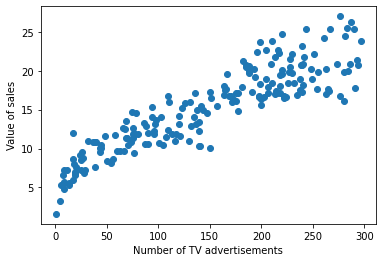

In [ ]:
plt.scatter(X_tv, y)
plt.xlabel('Number of TV advertisements')
plt.ylabel('Value of sales')
plt.show()

In [ ]:
X_tv = X_tv.reshape(-1,1)
y = y.reshape(-1, 1)

In [ ]:
X_tv.shape,y.shape

((200, 1), (200, 1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tv, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape,X_test.shape

((160, 1), (40, 1))

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred1 = reg.predict(X_train)
print(f'Performance of the model on training data :\n')
print(f'MAE = {mean_absolute_error(y_train, y_pred1)}')
print(f'MSE = {mean_squared_error(y_train, y_pred1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_pred1))}')
print(f'R_2 = {r2_score(y_train, y_pred1)}')

Performance of the model on training data :

MAE = 1.8005092256620792
MSE = 4.998442356450173
RMSE = 2.235719650683013
R_2 = 0.8134866044709264


In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred2 = reg.predict(X_test)
print(f'Performance of the model on test data :\n')
print(f'MAE = {mean_absolute_error(y_test, y_pred2)}')
print(f'MSE = {mean_squared_error(y_test, y_pred2)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred2))}')
print(f'R_2 = {r2_score(y_test, y_pred2)}')

Performance of the model on test data :

MAE = 1.9502948931650088
MSE = 6.101072906773963
RMSE = 2.470035001123256
R_2 = 0.802561303423698


In [ ]:
prediction_space = np.linspace(min(X_tv), max(X_tv)).reshape(-1,1)

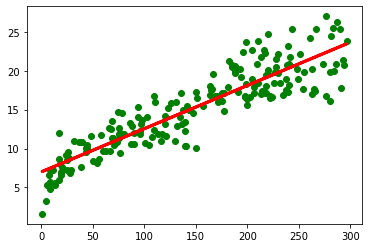

In [ ]:
plt.scatter(X_tv , y, color='green')
plt.plot(X_tv, reg.predict(X_tv), color='red', linewidth=3)
plt.show()